In [122]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
import skimage.morphology as morph
from skimage.measure import label,regionprops,find_contours
import skimage.color as color
%matplotlib inline

Threshold: 166


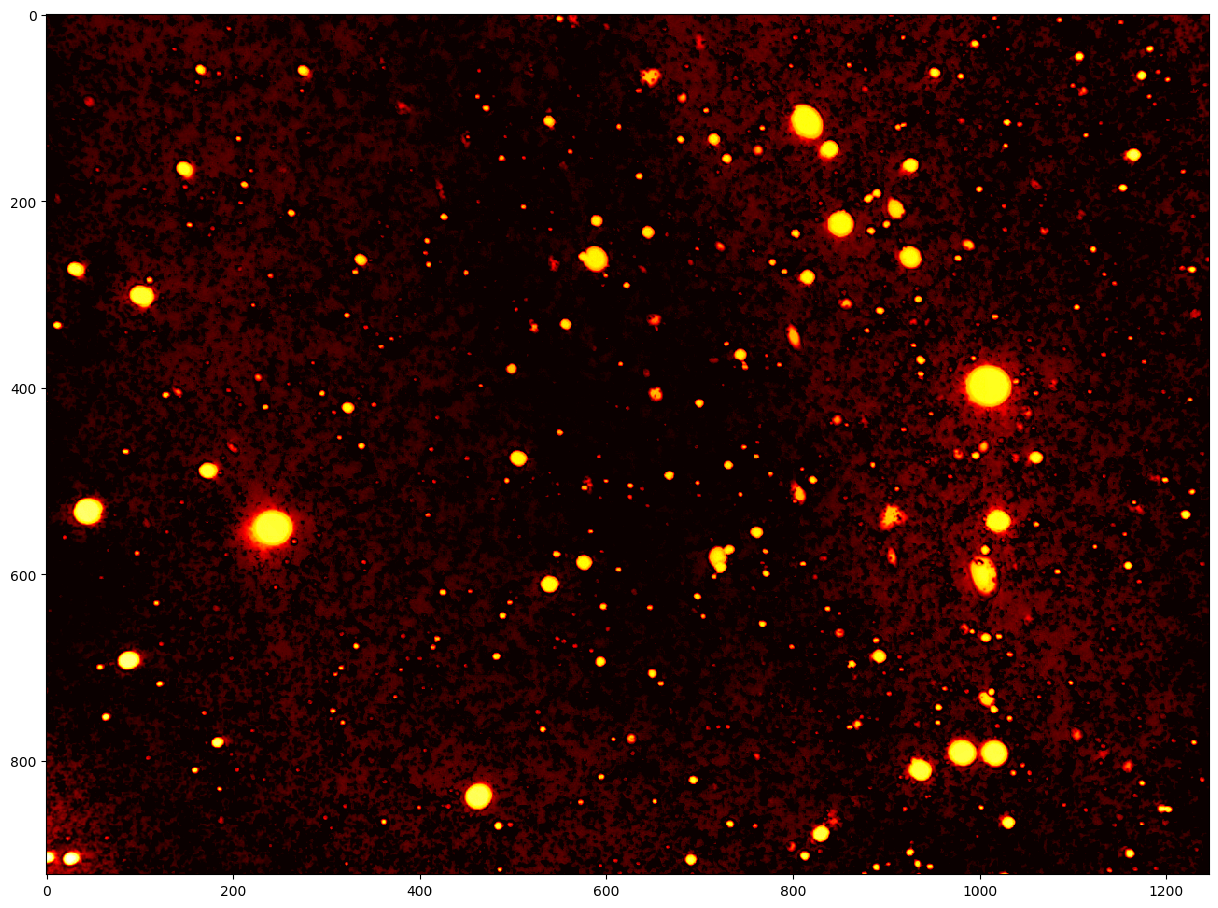

In [71]:
#######SELECCIONAR IMAGEN#######
## 1 - 17 ##
num = 1
################################

ruta = 'imagenes/img' + str(num) + '.bmp'

img = cv2.imread(ruta,0)
img_resize = img[:-50,50:]

len_x = img_resize.shape[0]
len_y = img_resize.shape[1]

z = img_resize.flatten()
z = z.reshape((len(z),1))
y = np.array([ i for i in range(len_y) ]*len_x)
x = np.array([ [i]*len_y for i in range(len_x)  ])
x = x.flatten()
xx = np.power(x, 2)
yy = np.power(y, 2)
xy = x*y
ones = np.ones(len(z))
H = np.array([ xx, yy, xy, x, y, ones ])
H = H.T
c = np.dot(H.T, H)
c = np.linalg.inv(c) 
c = np.dot(c, H.T)
c = np.dot(c, z)
z_fit = np.dot(H, c)
z_fit = z_fit.reshape((len_x, len_y)).astype(np.uint8)
res = cv2.subtract(img_resize,z_fit)
thold = np.max(res)
image = res * (res < thold)
print('Threshold:',thold)
plt.figure(figsize=(15,15),dpi = 100)
plt.imshow(res,cmap='hot');

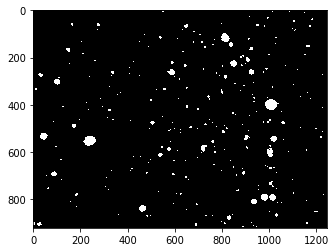

In [120]:
#PENDIENTE - CUADRAR BINARIZACION
imgbin = image > 65
plt.imshow(imgbin,cmap='gray')

Etiquetas: 363
Area promedio: 67.46280991735537
Diametro promedio: 6.611055848288281


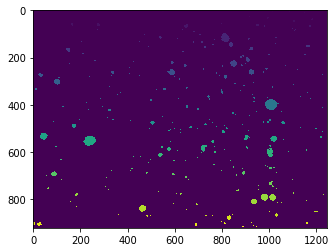

In [151]:
labeled = label(imgbin)
plt.imshow(labeled)

props = regionprops(labeled)

print('Etiquetas:',len(props))

area = 0
diametroseq = []

for i in range(0,len(props)):
    area += props[i].area
    diametroseq.append(props[i].equivalent_diameter)

#UNIDADES EN PIXELES
print('Area promedio:',area/len(props))
print('Diametro promedio:',np.mean(diametroseq))


363


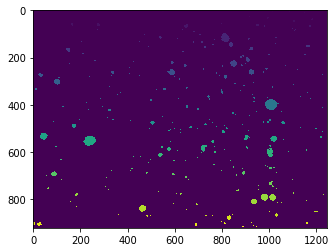